In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,log_loss
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\91998\\Desktop\\train.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
df.drop(columns=['PassengerId','Cabin','Name','Ticket'],inplace=True)

<AxesSubplot:>

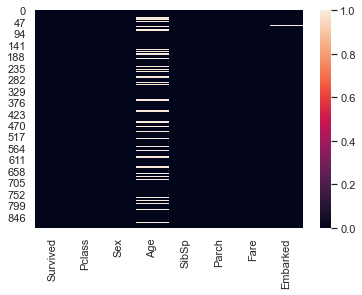

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.iloc[0]

Survived       0
Pclass         3
Sex         male
Age         22.0
SibSp          1
Parch          0
Fare        7.25
Embarked       S
Name: 0, dtype: object

In [13]:
df.isnull().sum()*100/len(df)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [14]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

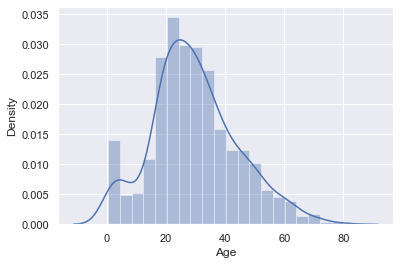

In [15]:
sns.distplot(df['Age'])

In [16]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [17]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [46]:
df.isnull().sum()*100/len(df)

Survived      0.0
Pclass        0.0
Age           0.0
SibSp         0.0
Parch         0.0
Fare          0.0
Sex_male      0.0
Embarked_Q    0.0
Embarked_S    0.0
dtype: float64

In [19]:
df.duplicated().sum()

111

In [20]:
df.drop_duplicates(inplace=True)

<Figure size 432x288 with 0 Axes>

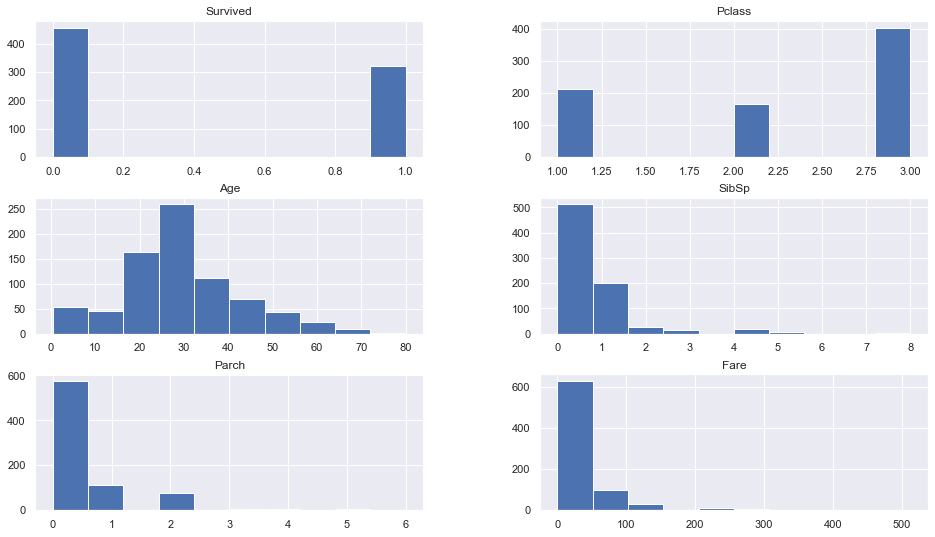

In [21]:
plt.figure()
df.hist(figsize=(16,9));

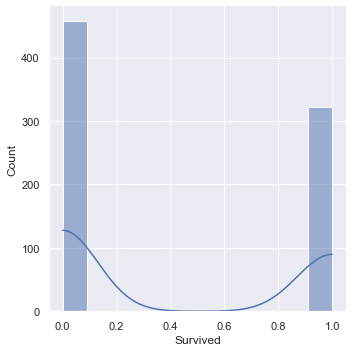

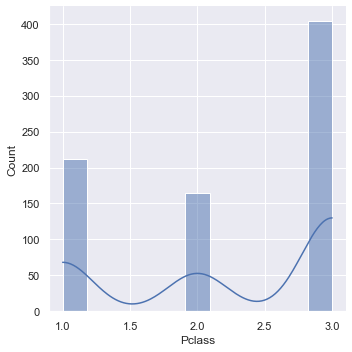

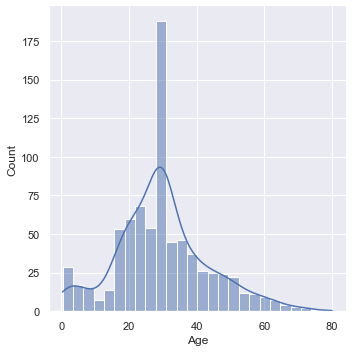

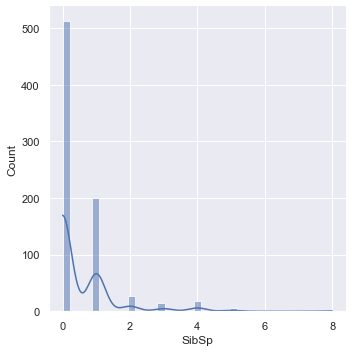

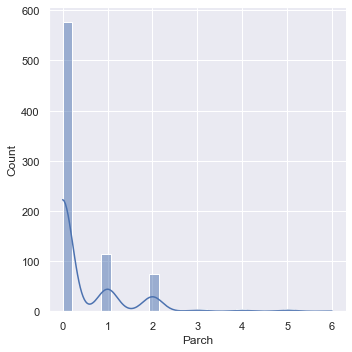

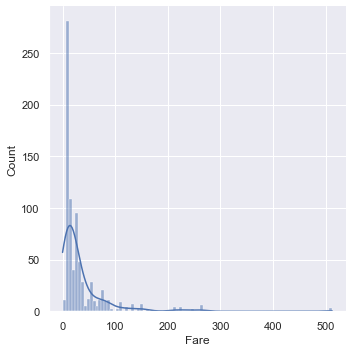

In [22]:
for col in df.select_dtypes(exclude=['object']):
    sns.displot(df[col],kde=True);

In [23]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

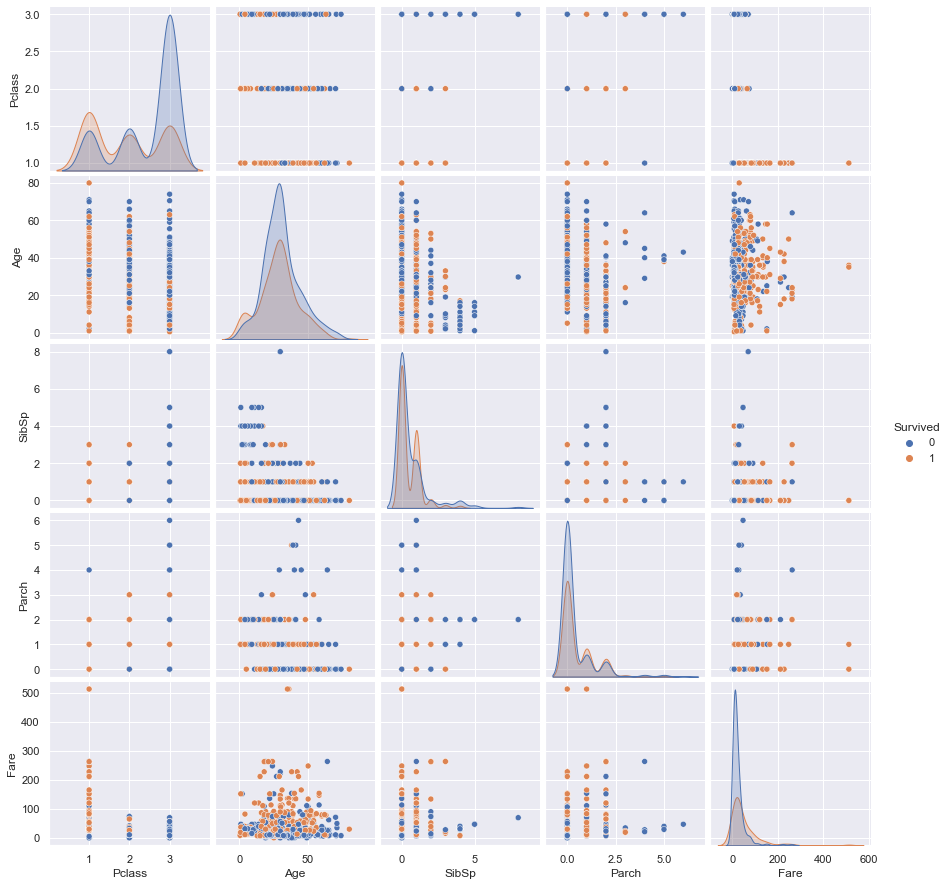

In [24]:
sns.pairplot(hue='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

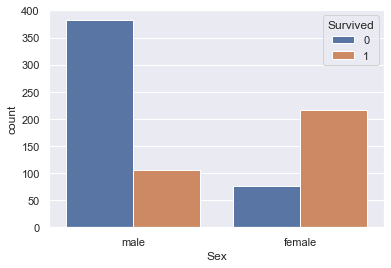

In [25]:
sns.countplot(hue='Survived',x='Sex',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

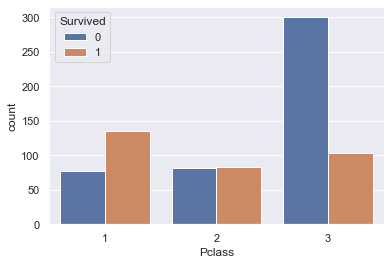

In [26]:
sns.countplot(hue='Survived',x='Pclass',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

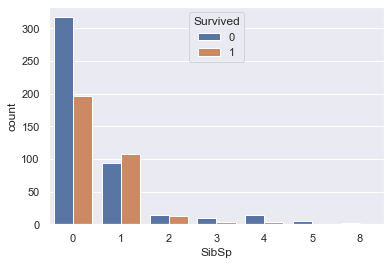

In [27]:
sns.countplot(hue='Survived',x='SibSp',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

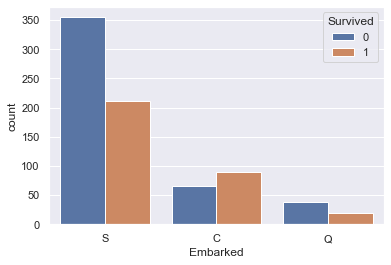

In [28]:
sns.countplot(hue='Survived',x='Embarked',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

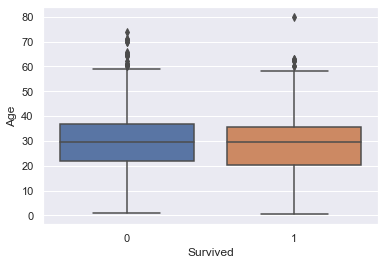

In [29]:
sns.boxplot(x='Survived',y='Age',data=df)

<AxesSubplot:>

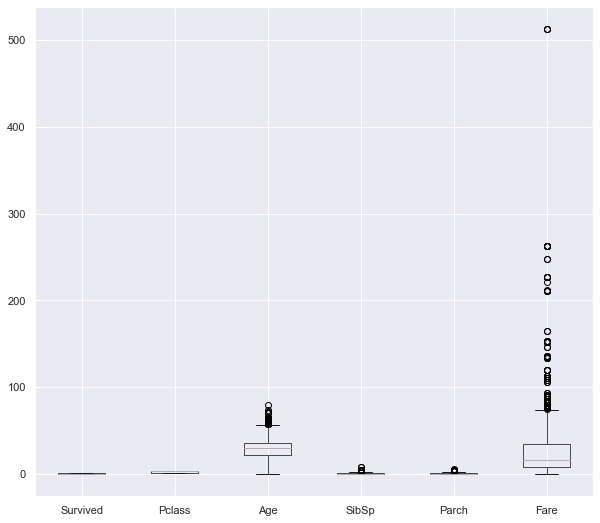

In [30]:
plt.figure(figsize=(10,9))
df.boxplot()

In [31]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [33]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [34]:
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

In [35]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.000000,0,5,29.1250,0,1,0
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [36]:
X=df.drop(columns=['Survived'],axis=1)

In [37]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
885,3,39.000000,0,5,29.1250,0,1,0
887,1,19.000000,0,0,30.0000,0,0,1
888,3,29.699118,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


In [38]:
y=df['Survived']

In [39]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 780, dtype: int64

In [40]:
df.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.25,1,0,1


In [41]:
cols_Scale=X[['Age','Fare','Pclass']]

In [42]:
scale=StandardScaler()

In [43]:
X_trans=scale.fit_transform(cols_Scale)

In [44]:
X[['Age','Fare','Pclass']]=X_trans

In [45]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.882823,-0.569164,1,0,-0.528033,1,0,1
1,-1.459361,0.598711,1,0,0.697956,0,0,0
2,0.882823,-0.277195,0,0,-0.515109,0,0,1
3,-1.459361,0.379735,1,0,0.349817,0,0,1
4,0.882823,0.379735,0,0,-0.512716,1,0,1
...,...,...,...,...,...,...,...,...
885,0.882823,0.671703,0,5,-0.109211,0,1,0
887,-1.459361,-0.788141,0,0,-0.092459,0,0,1
888,0.882823,-0.007188,1,2,-0.217866,0,0,1
889,-1.459361,-0.277195,0,0,-0.092459,1,0,0


In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
lrc=LogisticRegression()

In [61]:
lrc.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [62]:
y_test_pred=lrc.predict(X_test)

In [63]:
accuracy_score(y_test,y_test_pred)

0.782051282051282

In [64]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [65]:
os=SMOTETomek(0.97)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_ns)))

Original dataset shape Counter({0: 367, 1: 257})
Resampled dataset shape Counter({0: 323, 1: 311})


In [66]:
rf=RandomForestClassifier()

In [67]:
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [68]:
y_test_pred=rf.predict(X_test)

In [69]:
accuracy_score(y_test,y_test_pred)

0.8012820512820513

In [80]:
features=['Age','Fare']

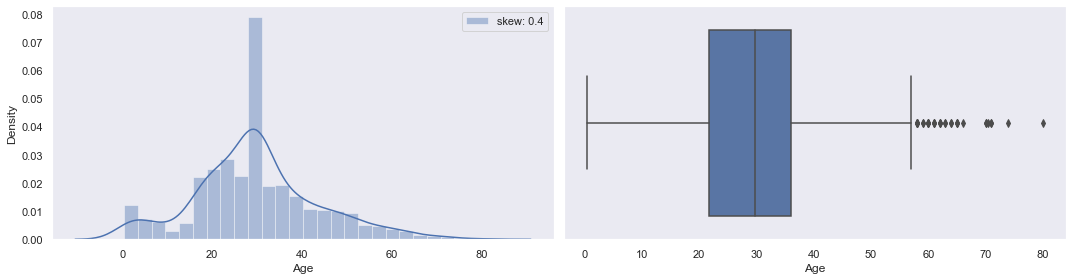

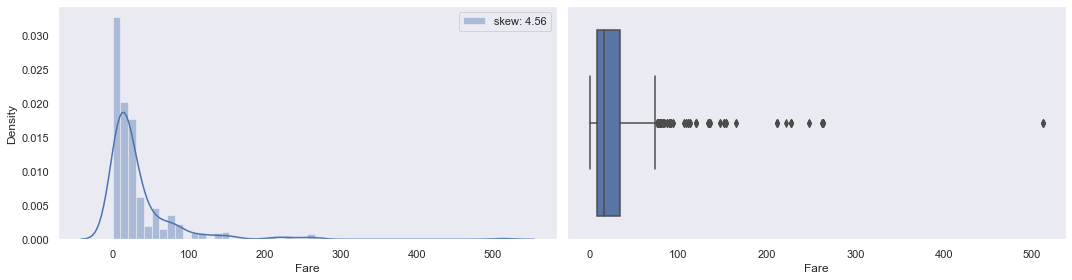

In [81]:
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [82]:
df_cap=df.copy()

In [83]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [84]:
iqr_capping(df_cap, features, 1.5)

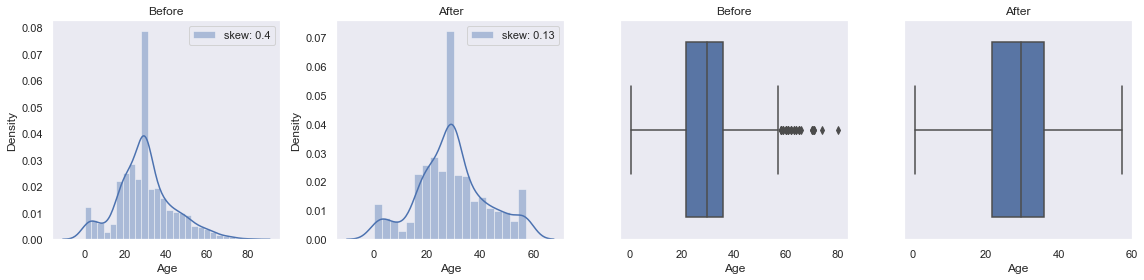

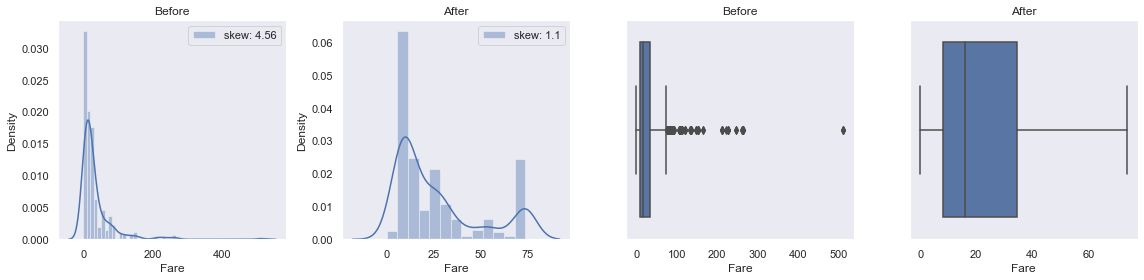

In [87]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [88]:
df_cap.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.25,1,0,1


In [92]:
X=df_cap.drop(columns=['Survived'],axis='columns')

In [93]:
y=df_cap['Survived']

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
params={'n_estimators':[130,120,140],'criterion':['gini','entropy'],'max_depth':[70,90],'min_samples_split':[3,4]}

In [71]:
rfc=RandomForestClassifier()

In [72]:
rfgs=GridSearchCV(rfc,params,cv=10,scoring='accuracy',n_jobs=-1)

In [73]:
rfgs.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [70, 90], 'min_samples_split': [3, 4],
                         'n_estimators': [130, 120, 140]},
             scoring='accuracy')

In [74]:
print("\n The best estimator across ALL searched params:\n",rfgs.best_estimator_)
print("\n The best score across ALL searched params:\n",rfgs.best_score_)
print("\n The best parameters across ALL searched params:\n",rfgs.best_params_)


 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=70, min_samples_split=4, n_estimators=130)

 The best score across ALL searched params:
 0.8565724206349206

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 70, 'min_samples_split': 4, 'n_estimators': 130}


In [95]:
rfc=RandomForestClassifier(criterion= 'gini', max_depth=70, min_samples_split=4, n_estimators=130)

In [96]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, min_samples_split=4, n_estimators=130)

In [97]:
y_test_pred=rfc.predict(X_test)

In [98]:
accuracy_score(y_test,y_test_pred)

0.8012820512820513